# virtualization_experiment_4.ipynb

This notebook processes the raw audio from `virtualization_experiment_3.ipynb` and 
writes out the separated streams (well, as separated as measurements and theory 
would imply).

In [1]:
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

GAIN = 50

def plot(data):
    plt.subplot(7, 1, 1)
    for i_channel in range(7):
        plt.subplot(7, 1, i_channel+1)
        plt.plot(data[:, i_channel])
        plt.ylabel(f'{i_channel}')
    plt.xlabel('Sample')
    plt.show()

def permute(data): # permute the channels to get the correct order of mics
    return data[:, [0, 1, 4, 5, 2, 3, 6]]

def beamform(data, target_dir=np.array([1, 0])):
    fs = 44100
    c = 343
    X = np.array([ # estimated positions of the microphones
        [0, 0],
        [0, 0.045],
        [0.039, 0.023],
        [0.039, -0.023],
        [0, -0.045],
        [-0.039, -0.023],
        [-0.039, 0.023],
    ])

    delay = (fs/c)*X@target_dir+8
    rounded_delay = (delay+0.5).astype(int)

    print(list(zip(X, delay)))

    data[:, 0] = np.roll(data[:, 0], rounded_delay[0])
    data[:, 1] = np.roll(data[:, 1], rounded_delay[1])
    data[:, 2] = np.roll(data[:, 2], rounded_delay[2])
    data[:, 3] = np.roll(data[:, 3], rounded_delay[3])
    data[:, 4] = np.roll(data[:, 4], rounded_delay[4])
    data[:, 5] = np.roll(data[:, 5], rounded_delay[5])
    data[:, 6] = np.roll(data[:, 6], rounded_delay[6])

    data = np.sum(data, axis=1)/7
    return data

[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 13.014285714285716), (array([ 0.039, -0.023]), 13.014285714285716), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 2.985714285714285), (array([-0.039,  0.023]), 2.985714285714285)]
[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 2.985714285714285), (array([ 0.039, -0.023]), 2.985714285714285), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 13.014285714285716), (array([-0.039,  0.023]), 13.014285714285716)]


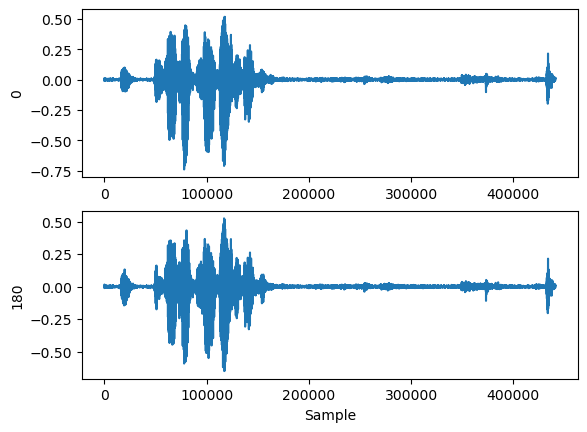

In [2]:
# two speakers at 0 and 180 degrees and level height

data = np.load('raw_2_level.npy')
data *= GAIN
data = permute(data)

spkr_0 = beamform(data, [1, 0])
spkr_180 = beamform(data, [-1, 0])

# plot all speakers
plt.subplot(2, 1, 1)
plt.plot(spkr_0)
plt.ylabel('0')
plt.subplot(2, 1, 2)
plt.plot(spkr_180)
plt.ylabel('180')
plt.xlabel('Sample')
plt.show()

# export each speaker to a wav file
write('raws/raw_2_level_spkr_0.wav', 44100, (32767*spkr_0).astype(np.int16))
write('raws/raw_2_level_spkr_180.wav', 44100, (32767*spkr_180).astype(np.int16))

[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 13.014285714285716), (array([ 0.039, -0.023]), 13.014285714285716), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 2.985714285714285), (array([-0.039,  0.023]), 2.985714285714285)]
[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 13.785714285714286), (array([0.039, 0.023]), 10.957142857142857), (array([ 0.039, -0.023]), 5.042857142857143), (array([ 0.   , -0.045]), 2.2142857142857135), (array([-0.039, -0.023]), 5.042857142857143), (array([-0.039,  0.023]), 10.957142857142857)]
[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 2.985714285714285), (array([ 0.039, -0.023]), 2.985714285714285), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 13.014285714285716), (array([-0.039,  0.023]), 13.014285714285716)]


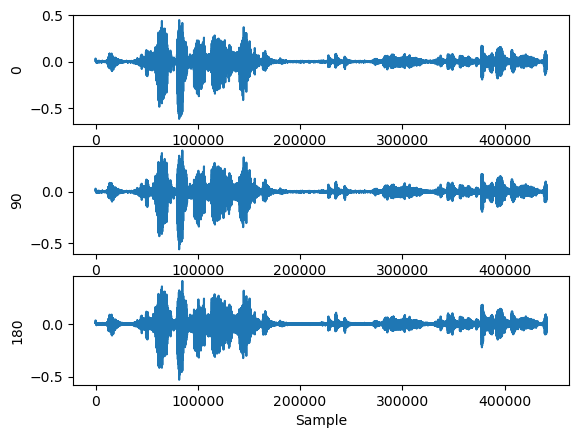

In [3]:
# three sources at 0, 90, and 180 degrees and level height

data = np.load('raw_3_level.npy')
data *= GAIN
data = permute(data)

spkr_0 = beamform(data, [1, 0])
spkr_90 = beamform(data, [0, 1])
spkr_180 = beamform(data, [-1, 0])

# plot all speakers
plt.subplot(3, 1, 1)
plt.plot(spkr_0)
plt.ylabel('0')
plt.subplot(3, 1, 2)
plt.plot(spkr_90)
plt.ylabel('90')
plt.subplot(3, 1, 3)
plt.plot(spkr_180)
plt.ylabel('180')
plt.xlabel('Sample')
plt.show()

# export each speaker to a wav file
write('raws/raw_3_level_spkr_0.wav', 44100, (32767*spkr_0).astype(np.int16))
write('raws/raw_3_level_spkr_90.wav', 44100, (32767*spkr_90).astype(np.int16))
write('raws/raw_3_level_spkr_180.wav', 44100, (32767*spkr_180).astype(np.int16))

[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 13.014285714285716), (array([ 0.039, -0.023]), 13.014285714285716), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 2.985714285714285), (array([-0.039,  0.023]), 2.985714285714285)]
[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 2.985714285714285), (array([ 0.039, -0.023]), 2.985714285714285), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 13.014285714285716), (array([-0.039,  0.023]), 13.014285714285716)]


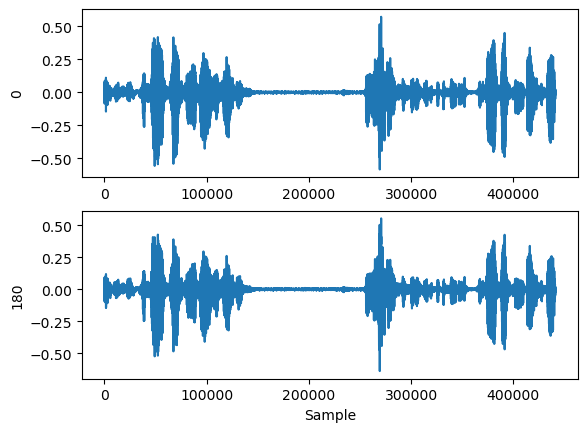

In [4]:
# two sources at 0 and 180 degrees and elevated height

data = np.load('raw_2_elev.npy') 
data *= GAIN
data = permute(data)

spkr_0 = beamform(data, [1, 0])
spkr_180 = beamform(data, [-1, 0])

# plot all speakers
plt.subplot(2, 1, 1)
plt.plot(spkr_0)
plt.ylabel('0')
plt.subplot(2, 1, 2)
plt.plot(spkr_180)
plt.ylabel('180')
plt.xlabel('Sample')
plt.show()

# export each speaker to a wav file
write('raws/raw_2_elev_spkr_0.wav', 44100, (32767*spkr_0).astype(np.int16))
write('raws/raw_2_elev_spkr_180.wav', 44100, (32767*spkr_180).astype(np.int16))

[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 13.014285714285716), (array([ 0.039, -0.023]), 13.014285714285716), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 2.985714285714285), (array([-0.039,  0.023]), 2.985714285714285)]
[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 13.785714285714286), (array([0.039, 0.023]), 10.957142857142857), (array([ 0.039, -0.023]), 5.042857142857143), (array([ 0.   , -0.045]), 2.2142857142857135), (array([-0.039, -0.023]), 5.042857142857143), (array([-0.039,  0.023]), 10.957142857142857)]
[(array([0., 0.]), 8.0), (array([0.   , 0.045]), 8.0), (array([0.039, 0.023]), 2.985714285714285), (array([ 0.039, -0.023]), 2.985714285714285), (array([ 0.   , -0.045]), 8.0), (array([-0.039, -0.023]), 13.014285714285716), (array([-0.039,  0.023]), 13.014285714285716)]


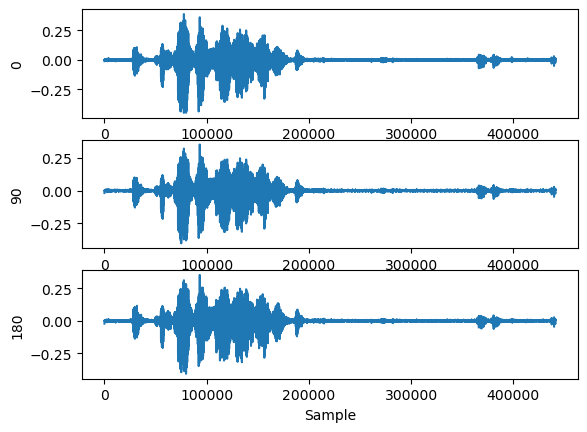

In [5]:
# three sources at 0, 90, and 180 degrees and elevated height

data = np.load('raw_3_elev.npy')
data *= GAIN
data = permute(data)

spkr_0 = beamform(data, [1, 0])
spkr_90 = beamform(data, [0, 1])
spkr_180 = beamform(data, [-1, 0])

# plot all speakers
plt.subplot(3, 1, 1)
plt.plot(spkr_0)
plt.ylabel('0')
plt.subplot(3, 1, 2)
plt.plot(spkr_90)
plt.ylabel('90')
plt.subplot(3, 1, 3)
plt.plot(spkr_180)
plt.ylabel('180')
plt.xlabel('Sample')
plt.show()

# export each speaker to a wav file
write('raws/raw_3_elev_spkr_0.wav', 44100, (32767*spkr_0).astype(np.int16))
write('raws/raw_3_elev_spkr_90.wav', 44100, (32767*spkr_90).astype(np.int16))
write('raws/raw_3_elev_spkr_180.wav', 44100, (32767*spkr_180).astype(np.int16))